In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [372]:
df_train_all = pd.read_csv('./train_formated.csv', index_col=[0])
df_train_all = df_train_all.rename(columns={'Давление пластовое' : 'press',
                                            'ПЛАСТ_X' : 'x_coord',
                                            'ПЛАСТ_Y' : 'y_coord',
                                            'clust' : 'cluster'})
df_train = df_train_all[df_train_all.month == 0]

In [373]:
df_test = pd.read_csv('./test_formatted.csv', index_col=[0])

df_test = df_test.rename(columns={'Давление пластовое' : 'press',
                                  'ПЛАСТ_X' : 'x_coord',
                                  'ПЛАСТ_Y' : 'y_coord',
                                  'clust' : 'cluster'})
df_test = df_test.drop('index', 1)

In [374]:
df_train.head()

,Дата,liq_rate,oil_rate,wct,gas_rate,gf,gas_prod,days_on,oil_prod,frac,month,press,x_coord,y_coord,cluster,num_of_pr,num_of_plast
Скважина,,,,,,,,,,,,,,,,,
005642f48d3e86d871bb701bac2ba042,2005-06-01,29.777778,29.722222,0.001866,1642.666667,64.000000,29568.0,18.000000,462.00,1.0,0,103.150000,NaN,NaN,NaN,2.0,NaN
02384c4d1324238fb99fcf66c88fbdad,2011-03-01,41.020408,32.204082,0.214925,1941.122449,69.224891,31705.0,16.333333,458.00,1.0,0,218.566667,NaN,NaN,NaN,3.0,NaN
02bd0350b7f0cef7af7ca50801d89810,2011-08-01,32.070000,18.270000,0.430309,2148.000000,140.208877,2148.0,1.000000,15.32,1.0,0,255.150000,1.297986e+07,3.998130e+07,1.0,2.0,1.0
02dba139f57f4aa50c3fbf56f586551f,2005-10-01,24.642857,19.785714,0.197101,1101.714286,64.000000,15424.0,14.000000,241.00,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
031f7cf95ada8d6e49ad6bd96c886d9c,2010-03-01,11.200000,10.752000,0.040000,688.128000,64.000000,NaN,NaN,NaN,0.0,0,83.000000,NaN,NaN,NaN,1.0,NaN


In [375]:
df_test.head()

,Дата,wct,gas_rate,gas_prod,days_on,frac,press,x_coord,y_coord,cluster,num_of_pr,num_of_plast
Скважина,,,,,,,,,,,,
002ff5b8a6dc271f58581e1b4fa2c5fc,2016-12-01,0.000,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
008d0347e572a5d938a9c40c29e539fc,2013-10-01,0.630,NaN,NaN,NaN,0,NaN,1.272636e+07,3.857880e+07,0.0,NaN,1.0
00b40cb7bb8c9fd1ac26b4cc86f2b291,2018-02-01,0.520,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
01ba18d8b6d29875a18d4bca4eb201d7,2014-05-01,0.348,1385.8,6929.0,5.0,1,117.5,NaN,NaN,NaN,1.0,NaN
024ec6f6e3f9c5150ecf525bf8b7a6a3,2017-06-01,0.000,NaN,0.0,0.0,1,231.0,1.243423e+07,3.781085e+07,1.0,1.0,2.0


## Предсказываем начальный дебит

Через газ

In [376]:
gas_index = df_test.gas_prod > 0
gas_0 = df_test.gas_prod == 0

In [377]:
mean_angle = (df_train.oil_prod[df_train.gas_prod > 0] / (df_train.gas_prod[df_train.gas_prod > 0])).mean(skipna=True)

In [378]:
mean_angle

0.015612541152141288

In [379]:
starting_oil_pred = np.zeros(df_test.shape[0]) 
starting_oil_pred[gas_index] = mean_angle * df_test.gas_prod[gas_index]

Остальное

In [380]:
X = pd.DataFrame(df_train[['frac', 'press', 'x_coord', 'y_coord', 'cluster', 'num_of_pr', 'num_of_plast', 'oil_prod']])
X_test = pd.DataFrame(df_test[['frac', 'press', 'x_coord', 'y_coord', 'cluster', 'num_of_pr', 'num_of_plast']])[~gas_index]

In [381]:
unity = pd.concat([X, X_test], axis=0)
unity = pd.get_dummies(unity, columns=['frac', 'cluster', 'num_of_pr', 'num_of_plast'])
X = pd.DataFrame(unity[:X.shape[0]])
X_test = pd.DataFrame(unity[X.shape[0]:])

In [382]:
X['w'] = df_train.x_coord.notnull()

In [383]:
X_test = X_test.fillna({'press' : X.press.mean(),
                        'cluster' : -1,
                        'x_coord' : X.x_coord.mean(),
                        'y_coord' : X.y_coord.mean(),
                        'num_of_pr' : -1,
                        'num_of_plast' : -1})

X = X.fillna({'press' : X.press.mean(),
             'cluster' : -1,
             'x_coord' : X.x_coord.mean(),
             'y_coord' : X.y_coord.mean(),
             'num_of_pr' : -1,
             'num_of_plast' : -1}).dropna(0)

In [384]:
y = X.oil_prod
weights = (X['w'] * 2 + 1).values
X = X.drop(['oil_prod', 'w'], 1)
X_test = X_test.drop('oil_prod', 1)

In [385]:
from sklearn.preprocessing import scale, StandardScaler

In [386]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

Модель

In [387]:
from sklearn.svm import LinearSVR, SVR

In [388]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer

In [390]:
svm = SVR(kernel='linear')
cross_val_score(svm, X, y, fit_params={'sample_weight' : weights}, cv=10, scoring=make_scorer(mae)).mean()

353.91611903645446

In [391]:
svm.fit(X, y, weights)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [392]:
starting_oil_pred[~gas_index] = svm.predict(X_test)

## Предсказываем ряд добычи

In [393]:
df_train_all['prev_debit'] = np.roll(df_train_all.oil_prod, 1)

In [394]:
X = pd.DataFrame(df_train_all[['month', 'oil_prod','prev_debit', 'frac', 'press', 'x_coord', 'y_coord', 'cluster', 'num_of_pr', 'num_of_plast']])
X = X[X.month != 0]

In [420]:
X_test = pd.concat([df_test[['frac', 'press', 'x_coord', 'y_coord', 'cluster', 'num_of_pr', 'num_of_plast']]]*6).sort_index()

In [421]:
X_test['month'] = np.repeat([[0, 1, 2, 3, 4, 5]], X_test.shape[0] / 6, axis=0).ravel()
X_test['prev_debit'] = np.repeat(starting_oil_pred, 6)
X_test['oil_prod'] = np.repeat(starting_oil_pred, 6)
X_test = X_test.sort_index()

In [422]:
X_test[:10]

,frac,press,x_coord,y_coord,cluster,num_of_pr,num_of_plast,month,prev_debit,oil_prod
Скважина,,,,,,,,,,
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,0,271.099942,271.099942
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,1,271.099942,271.099942
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,2,271.099942,271.099942
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,3,271.099942,271.099942
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,4,271.099942,271.099942
002ff5b8a6dc271f58581e1b4fa2c5fc,1,NaN,NaN,NaN,NaN,NaN,NaN,5,271.099942,271.099942
008d0347e572a5d938a9c40c29e539fc,0,NaN,1.272636e+07,3.857880e+07,0.0,NaN,1.0,0,471.904099,471.904099
008d0347e572a5d938a9c40c29e539fc,0,NaN,1.272636e+07,3.857880e+07,0.0,NaN,1.0,1,471.904099,471.904099
008d0347e572a5d938a9c40c29e539fc,0,NaN,1.272636e+07,3.857880e+07,0.0,NaN,1.0,2,471.904099,471.904099


In [423]:
X[:10]

,month,oil_prod,prev_debit,frac,press,x_coord,y_coord,cluster,num_of_pr,num_of_plast
Скважина,,,,,,,,,,
005642f48d3e86d871bb701bac2ba042,1,170.00,462.00,1.0,103.150000,NaN,NaN,NaN,2.0,NaN
005642f48d3e86d871bb701bac2ba042,2,140.00,170.00,1.0,103.150000,NaN,NaN,NaN,2.0,NaN
005642f48d3e86d871bb701bac2ba042,3,124.00,140.00,1.0,103.150000,NaN,NaN,NaN,2.0,NaN
005642f48d3e86d871bb701bac2ba042,4,254.00,124.00,1.0,103.150000,NaN,NaN,NaN,2.0,NaN
005642f48d3e86d871bb701bac2ba042,5,1269.00,254.00,1.0,103.150000,NaN,NaN,NaN,2.0,NaN
02384c4d1324238fb99fcf66c88fbdad,1,981.00,458.00,1.0,218.566667,NaN,NaN,NaN,3.0,NaN
02384c4d1324238fb99fcf66c88fbdad,2,757.00,981.00,1.0,218.566667,NaN,NaN,NaN,3.0,NaN
02384c4d1324238fb99fcf66c88fbdad,3,730.00,757.00,1.0,218.566667,NaN,NaN,NaN,3.0,NaN
02384c4d1324238fb99fcf66c88fbdad,4,639.57,730.00,1.0,218.566667,NaN,NaN,NaN,3.0,NaN


In [424]:
xy = X[['month', 'oil_prod', 'prev_debit']].dropna()
x = xy[['month', 'prev_debit']]
y = xy.oil_prod

In [425]:
x = pd.get_dummies(x, columns=['month'])

In [426]:
x = scaler.fit_transform(x)

In [427]:
pred_svm = SVR('linear')
cross_val_score(pred_svm, x, y, cv=10, scoring=make_scorer(mae)).mean()

177.77762614658914

In [428]:
pred_svm.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [429]:
preds = pd.get_dummies(X_test[['month', 'prev_debit']], columns=['month'])
preds = preds[preds.month_0 != 1]
preds = preds.drop('month_0', 1)

In [431]:
s = starting_oil_pred.size
pred_0 = np.zeros(s)
pred_1 = np.zeros(s)
pred_2 = np.zeros(s)
pred_3 = np.zeros(s)
pred_4 = np.zeros(s)
pred_5 = np.zeros(s)

In [432]:
pred_0[~gas_0] = starting_oil_pred[~gas_0]
pred_1[gas_0] = starting_oil_pred[gas_0]
preds['prev_debit'][preds.month_1 == 1] = pred_0
pred_1[~gas_0] = pred_svm.predict(scaler.transform(preds[preds.month_1 == 1][~gas_0]))
preds['prev_debit'][preds.month_2 == 1] = pred_1
pred_2 = pred_svm.predict(scaler.transform(preds[preds.month_2 == 1]))
preds['prev_debit'][preds.month_3 == 1] = pred_2
pred_3 = pred_svm.predict(scaler.transform(preds[preds.month_3 == 1]))
preds['prev_debit'][preds.month_4 == 1] = pred_3
pred_4 = pred_svm.predict(scaler.transform(preds[preds.month_4 == 1]))
preds['prev_debit'][preds.month_5 == 1] = pred_4
pred_5 = pred_svm.predict(scaler.transform(preds[preds.month_5 == 1]))

/Users/aramdavtyan/datascience-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aramdavtyan/datascience-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/aramdavtyan/datascience-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  impo

In [434]:
oil_series = np.stack([pred_0, pred_1, pred_2, pred_3, pred_4, pred_5], 1)

In [436]:
oil_series.shape

(266, 6)

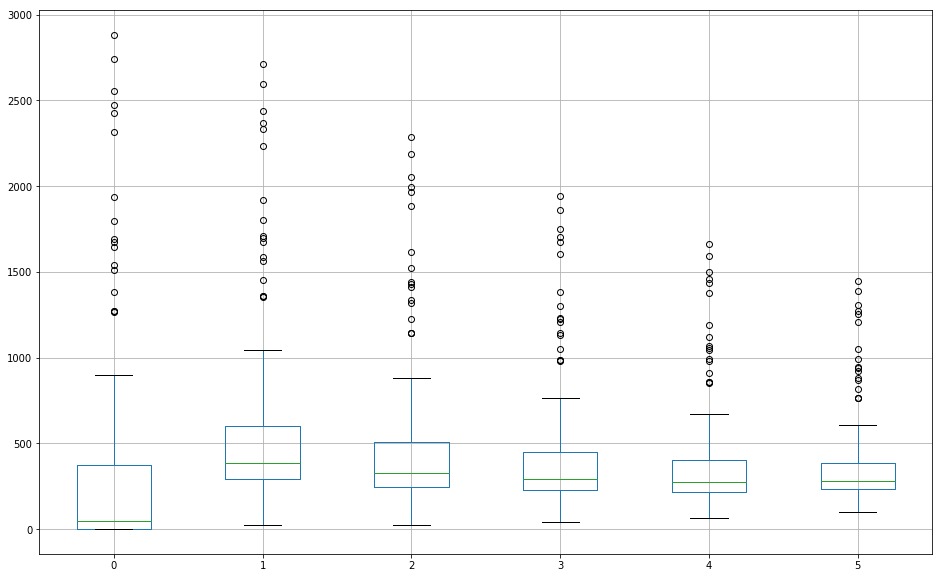

In [437]:
plt.figure(figsize=(16, 10))
pd.DataFrame(oil_series).boxplot()

In [368]:
oil_series = 2*oil_series

In [369]:
# pd.DataFrame(oil_series.reshape(-1, 1)).to_csv('./predictions.csv')